**Play the notebook: Boosting Classification**

# Description

The aim of this exercise to understand classification using boosting by plotting the decision boundary after each stump. 

# Instructions:
- Read the dataset `boostingclassifier.csv` as pandas dataframe and take a quick look.
- All columns except `landtype` are predictors. `landtype` is the response variable.
- Define the AdaBoost classifier from scratch within the function `AdaBoost_scratch`:
    - Define a Decision Tree classifier stump
    - Fit and predict the classifier on the entire data.
    - Compute the number of incorrect predictions.
    - Compute the error and new weights.
    - Update the weights
- Call the `AdaBoost_scratch` function with the predictor and response variables for 6 stumps.
- Use the helper code provided to visualize the classification decision boundary for 6 stumps.

# Hints:
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank">DecisionTreeClassifier()</a> : A decision tree classifier.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit" target="_blank">sklearn.fit()</a> : Builds a model from the training set.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.average.html" target="_blank">np.average()</a> : Computes the weighted average along the specified axis.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.mean.html?highlight=mean#numpy.mean" target="_blank">np.mean()</a> : Computes the arithmetic mean along the specified axis.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.log.html?highlight=log#numpy.log" target="_blank">np.log()</a> : Natural logarithm, element-wise.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.exp.html?highlight=exp#numpy.exp" target="_blank">np.exp()</a> : Calculates the exponential of all elements in the input array.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html?highlight=adaboost#sklearn.ensemble.AdaBoostClassifier" target="_blank">sklearn.AdaBoostClassifier()</a> : An AdaBoost classifier.

In [8]:
# Import necessary libraries

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
sns.set_style('white')
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from helper import plot_decision_boundary
%matplotlib inline

In [5]:
# Read the dataset as a pandas dataframe
df = pd.read_csv("data/boostingclassifier.csv")

# Read the columns latitude and longitude as the predictor variables
X = df[['latitude','longitude']].values

# Landtype is the response variable
y = df['landtype'].values

In [3]:
# AdaBoost algorithm implementation from scratch

def AdaBoost_scratch(X,y, M=10, learning_rate = 1):
    #Initialization of utility variables
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [], [],[],[],[]

    #Initialize the sample weights
    sample_weight = np.ones(N) / N
    
    # Cooy the sample weights to another list
    sample_weight_list.append(sample_weight.copy())

    #For m = 1 to M where M is the number of stumps
    for m in range(M):   

        #Fit a Decision Tree classifier stump with a maximum of 2 leaf nodes
        estimator = ___
        
        # Fit the model on the entire data with the sample weight initialise before
        estimator.fit(___)
        
        # Predict on the entire data
        y_predict = estimator.predict(X)

        # Compute the number of misclassifications
        incorrect = (y_predict != y)

        # Compute the error as the mean of the weighted sum of the number of incorrect predictions given the sample weight
        estimator_error = ___
        
        # Compute the new weights using the learning rate and estimator error
        estimator_weight =  ___

        # Boost the sample weights
        sample_weight *= np.exp(estimator_weight * incorrect * ((sample_weight > 0) | (estimator_weight < 0)))

        # Save the iteration values
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
        

    #Convert to np array for convenience   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    # Compute the predictions
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    
    # Return the model, estimated weights and sample weights
    return estimator_list, estimator_weight_list, sample_weight_list

In [11]:
### edTest(test_adaboost) ###
# Call the AdaBoost function to perform boosting classification
estimator_list, estimator_weight_list, sample_weight_list  = AdaBoost_scratch(X,y, M=6, learning_rate = 1)


In [ ]:
# Helper code to plot the AdaBoost Decision Boundary stumps
fig = plt.figure(figsize = (14,14))
for m in range(0,6):
    fig.add_subplot(3,2,m+1)

    s_weights = (sample_weight_list[m,:] / sample_weight_list[m,:].sum() ) * 300
    plot_decision_boundary(estimator_list[m], X,y,N = 50, scatter_weights =s_weights,counter=m)
    plt.tight_layout()

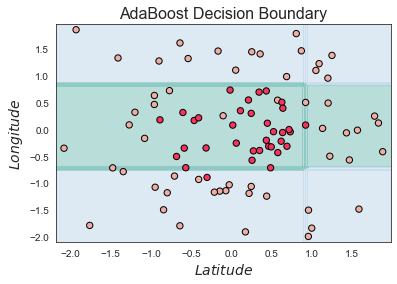

In [9]:
# Use sklearn's AdaBoostClassifier to take a look at the final decision boundary 

# Initialise the model with Decision Tree classifier as the base model same as above
# Use SAMME as the algorithm and 6 estimators with learning rate as 1
boost = AdaBoostClassifier( base_estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2), 
                            algorithm = 'SAMME',n_estimators=6, learning_rate=1.0)

# Fit on the entire data
boost.fit(X,y)

# Call the plot_decision_boundary function to plot the decision boundary of the model 
plot_decision_boundary(boost, X,y, N = 50)

plt.title('AdaBoost Decision Boundary', fontsize=16)
plt.show()